In [52]:
import pandas as pd
from scipy.stats import ttest_ind
from collections import defaultdict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
!ls cleaned\ csv

'ls' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [53]:
df = pd.read_csv('cleaned csv/host_profile_manual_image_labelling_results.csv', usecols=[4,5,6])#, converters=)

In [54]:
df.head()

,Number of people / Max,House in / Max,Site(AB:1/CS:2)
0,1,1,1
1,1,0,2
2,1,0,1
3,1,1,2
4,1,0,1


In [55]:
df = df.reset_index()

In [56]:
df.head()

,index,Number of people / Max,House in / Max,Site(AB:1/CS:2)
0,0,1,1,1
1,1,1,0,2
2,2,1,0,1
3,3,1,1,2
4,4,1,0,1


In [57]:
df['abcs'] = df['index'].apply(lambda x: 1 if x%2==0 else 2)

In [58]:
df['house_in_int'] = df['House in / Max'].apply(lambda x: int(x))

ValueError: invalid literal for int() with base 10: '-'

In [59]:
df.tail()

,index,Number of people / Max,House in / Max,Site(AB:1/CS:2),abcs
1995,1995,2,0,2,2
1996,1996,1,0,2,1
1997,1997,1,0,2,2
1998,1998,2,1,2,1
1999,1999,1,0,2,2


In [60]:
del df['Site(AB:1/CS:2)']

In [61]:
len(df)

2000

In [51]:
len(df[df['index'] < 320].dropna())

319

In [91]:
ab = df[df['abcs'] == 2].dropna()
cs = df[df['abcs'] == 1].dropna()

In [64]:
len(ab), len(cs)

(1000, 1000)

In [92]:
ab.head()

,index,Number of people / Max,House in / Max,abcs
1,1,1,0,2
3,3,1,1,2
5,5,1,0,2
7,7,1,1,2
9,9,1,0,2


In [93]:
cs.tail()

,index,Number of people / Max,House in / Max,abcs
1990,1990,3,0,1
1992,1992,1,1,1
1994,1994,1,0,1
1996,1996,1,0,1
1998,1998,2,1,1


In [94]:
cs.tail()

,index,Number of people / Max,House in / Max,abcs
1990,1990,3,0,1
1992,1992,1,1,1
1994,1994,1,0,1
1996,1996,1,0,1
1998,1998,2,1,1


# Tests

+ average number of faces, site, t-test
+ number of no faces, site, t-test
+ number of multifaces, site, max
+ smiles per facs, site, t-test

In [95]:
ab['Number of people / Max'].mean(), cs['Number of people / Max'].mean()

(1.279, 1.23)

Face occurence frequnecy

In [96]:
ab['nfaces'] = ab['Number of people / Max']
cs['nfaces'] = cs['Number of people / Max']

In [97]:
ab['anyfaces'] = ab['nfaces']!=0
cs['anyfaces'] = cs['nfaces']!=0

ab['multifaces'] = ab['nfaces']>1
cs['multifaces'] = cs['nfaces']>1

abhasface = ab[ab['anyfaces']==True]
cshasface = cs[cs['anyfaces']==True]

abhas1face = ab[ab['nfaces']==1]
cshas1face = cs[cs['nfaces']==1]

In [98]:
ab['nfaces'].mean(), cs['nfaces'].mean()

(1.279, 1.23)

In [99]:
ttest_ind(ab['nfaces'], cs['nfaces'])

Ttest_indResult(statistic=1.3828822782287198, pvalue=0.16685548959945448)

In [100]:
ab['multifaces'].mean(), cs['multifaces'].mean()

(0.29299999999999998, 0.216)

In [101]:
ttest_ind(ab['multifaces'], cs['multifaces'])

Ttest_indResult(statistic=3.9663758285086379, pvalue=7.554635811706897e-05)

In [102]:
ab['anyfaces'].mean(), cs['anyfaces'].mean()

(0.90000000000000002, 0.93400000000000005)

In [103]:
ttest_ind(ab['anyfaces'], cs['anyfaces'])

Ttest_indResult(statistic=-2.7596184851798182, pvalue=0.0058396919612258274)

### More question Houses:

+ how many '2' professional background photos
+ how many '01' no person, just a house

In [104]:
ab['nohouse'] = ab['House in / Max'] == '0'
cs['nohouse'] = cs['House in / Max'] == '0'

ab['house'] = ab['House in / Max'] == '1'
cs['house'] = cs['House in / Max'] == '1'

ab['professional'] = ab['House in / Max'] == '2'
cs['professional'] = cs['House in / Max'] == '2'

In [105]:
ab['nohouse'].mean(), cs['nohouse'].mean()

(0.67400000000000004, 0.75600000000000001)

In [106]:
ttest_ind(ab['nohouse'], cs['nohouse'])

Ttest_indResult(statistic=-4.0766637230642848, pvalue=4.7476250909088039e-05)

In [107]:
ab['house'].mean(), cs['house'].mean()

(0.23000000000000001, 0.20799999999999999)

In [108]:
ttest_ind(ab['house'], cs['house'])

Ttest_indResult(statistic=1.1893139856522397, pvalue=0.23445745148364985)

In [109]:
ab['professional'].mean(), cs['professional'].mean()

(0.095000000000000001, 0.035999999999999997)

In [110]:
ttest_ind(ab['professional'], cs['professional'])

Ttest_indResult(statistic=5.3680790719195697, pvalue=8.883080239411766e-08)

# Graphs

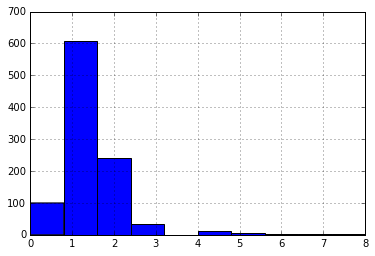

In [111]:
ab['nfaces'].hist()

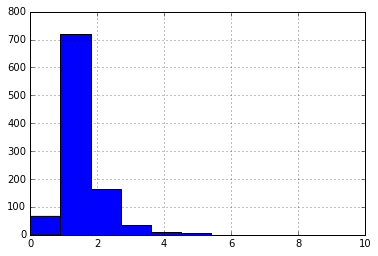

In [112]:
cs['nfaces'].hist()

TypeError: unorderable types: str() < float()

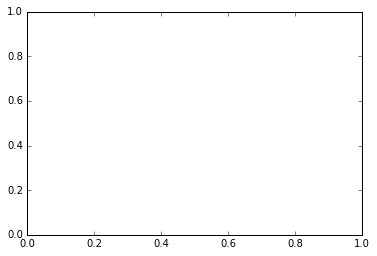

In [113]:
ab['House in / Max'].hist()